In [1]:
import numpy as np
import math 
import bitarray
from math import *
from matplotlib import pyplot as plt

In [2]:
## shift : the amount on which the basis function is shifted by
## number : the number of the basis function start at 0
##number = t
T = 1 ##The lenght of the basis function
value = 1/math.sqrt(T) ## The height of the function considering it is a rect

f_s = 22050
T_s = 1/f_s
sigma = 0.05


#x the basis number
def basis(x,t):
    if x >T and x<=(1+T) : 
        return value
    
def r(t) :
    return sinc(t)

def basis_rect(t) :
    return 

In [3]:
def fourier_transform(x, start, end):
    nb_coef = end - start
    result = np.zeros(nb_coef)
    n = np.arange(x.shape[0])
    for f in np.arange(start, end):
        result[f - start] = np.abs(np.sum(x/f_s * np.exp(-2*1j*pi* f * (n/f_s))))
    
    return result

In [4]:
pss_array = pss()
plt.plot(fourier_transform(pss_array, -4000, 4000))

NameError: name 'pss' is not defined

In [5]:
B = 0.8
T = 2

def root_raised_cos(t):
    return 4*B / (pi*sqrt(T)) * (cos((1+B)*pi*t/T) + (1-B)*pi/(4*B)*np.sinc((1-B)*t/T))/ (1 - (4*B*t/T)**2)

In [6]:
def root_raised_cos_v2(t, T):
    if t == np.abs(T/(4*B)) : 
        return B/(pi*sqrt(2*T)) * ((pi + 2)*np.sin(pi/(4*B)) + (pi - 2)*cos(pi/(4*B)))
    else :
        return 4*B / (pi*sqrt(T)) * (cos((1+B)*pi*t/T) + (1-B)*pi/(4*B)*np.sinc((1-B)*t/T))/ (1 - (4*B*t/T)**2)

In [7]:
root_raised = np.vectorize(root_raised_cos_v2)

In [8]:
#Working : 50*T_s and -500, 501

In [9]:
nb_samples_root_raised = 200
n_T = 11 # number of samples to get to T in the root raised cosinus
n = nb_samples_root_raised//2
t_s = np.arange(-n, n)/f_s
root_raised_12_Ts = root_raised(t_s, n_T*T_s)
root_raised_12_Ts_rescaled = root_raised_12_Ts/np.max(root_raised_12_Ts)

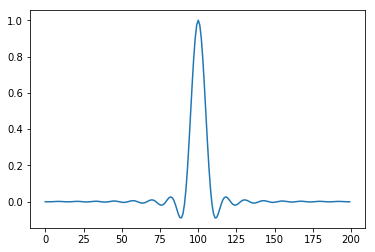

In [10]:
plt.plot(root_raised_12_Ts_rescaled)

In [13]:
basis_2 = root_raised_12_Ts_rescaled

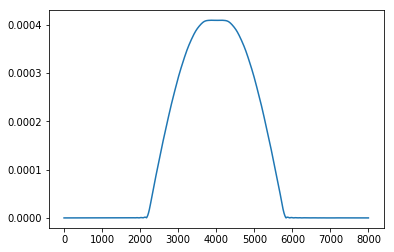

In [14]:
plt.plot(fourier_transform(basis_2, -4000, 4000))

In [15]:
def text_to_bit(text):
    ba = bitarray.bitarray()
    ba.frombytes(text.encode('utf-8'))
    ba = np.fromiter(map(lambda x : 1 if x else 0, ba.tolist()), dtype = int)
    return ba

In [16]:
def bit_to_text(bit):
    ba = bitarray.bitarray(bit.tolist())
    r = ba.tobytes()
    return  str(r,'utf8')

In [17]:
#right now convert (0,1) array to (-1 , 1) array
def b_to_c(array):
    c_s = (array -1/2)*2
    return c_s

In [18]:
##### Design a transmitter that reads a text file and returns real-valued samples of an
#information-bearing signal s[n].
#arg text_file : an array of sended values
const_size = 2
def transmitter(text_file, basis_size):
    size = text_file.shape[0]
    result = np.zeros(size*basis_size)
    for i in range(size):
        result[basis_size*i:basis_size*(i+1)] = text_file[i]*basis_2
    return result

In [19]:
def transmitter_2_bits(text_file, basis_size):
    size = text_file.shape[0]
    result = np.zeros(size//2*basis_size)
    for i in range(size//2):
        if text_file[2*i] == 1 and text_file[2*i+1] == 1:
            res = basis_2
        elif text_file[2*i] == 1 and text_file[2*i+1] == 0:
            res = 0.333*basis_2
        elif text_file[2*i] == 0 and text_file[2*i+1] == 1:
            res = -0.333*basis_2
        else:
            res = -basis_2
        result[basis_size*i:basis_size*(i+1)] = res
    return result

In [20]:
def transmitter_2(text_file):
    text_size = text_file.shape[0]
    result = np.zeros(nb_samples_root_raised + n_T * (text_size -1))
    for i in range(text_size) :
        result[n_T*i : 200 + n_T*i] += text_file[i]*root_raised_12_Ts_rescaled
    return result
    

In [66]:
def create_random(size):
    random_text =  np.sign(np.random.rand(size) -0.5)
    result = np.zeros(nb_samples_root_raised *size)
    for i in range(size) : 
        result[nb_samples_root_raised*i:nb_samples_root_raised*(i+1)] = root_raised_12_Ts_rescaled * random_text[i]
    return result        

In [73]:
def create_random(size):
    random_text =  np.sign(np.random.rand(size) -0.5)
    
    return random_text

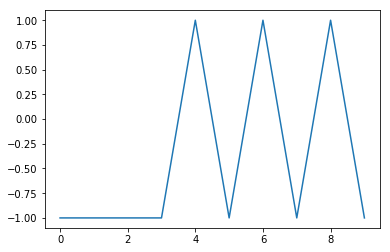

In [76]:
plt.plot(create_random(10))

In [77]:
print(np.sign(np.random.rand(10) ))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [78]:
def low_pass(arr, f_0):
    T = 2*f_0
    t = np.arange(-100,100)/f_s
    sinc = T *np.sinc(T*t)
    
    return np.convolve(arr/f_s, sinc, mode = 'same')

In [79]:
def shift(arr, f_0):
    indices = np.arange(arr.shape[0])
    return (arr * np.exp(1j * 2 * pi * f_0 * indices/f_s))

In [80]:
string_text = "CCCccccccccC"
random_size = int(50*len(string_text)/100)
start_random = create_random(random_size)
end_random = create_random(random_size)
constellation = b_to_c(text_to_bit(string_text))
size_sent = len(constellation)

#constellation = np.concatenate( (start_random, constellation, end_random) , axis = 0)
a_transmitted = transmitter_2(constellation)
#a_transmitted = np.concatenate( (start_random,a_transmitted, end_random), axis = 0)
start_transmitted =transmitter_2(start_random)
end_transmitted =transmitter_2(end_random)
a_transmitted = np.concatenate((start_transmitted, a_transmitted, end_transmitted))
f_1= 3000 # first value to shift
f_2 = 7000 # second value to shift 
a_transmitted = shift(a_transmitted,f_1) + shift(a_transmitted, f_2)
a_transmitted = np.real(a_transmitted)
#start_random_modulated = a_transmitted[:len(start_transmitted)]
#start_end_modulated = a_transmitted[-len(end_transmitted):]

In [81]:
convolution_start = np.correlate(a_transmitted,start_transmitted , mode = 'same')
convolution_end = np.correlate(a_transmitted,end_transmitted , mode = 'same')

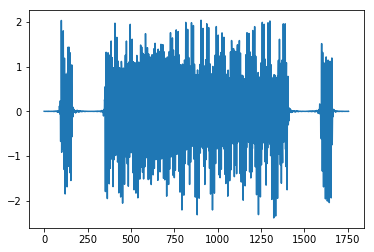

In [82]:
plt.plot(a_transmitted)

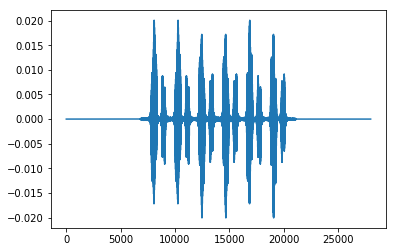

In [72]:
plt.plot(convolution_start)

/Users/pldelacour/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


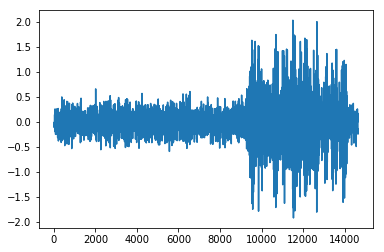

In [48]:
plt.plot(convolution_end)

In [49]:
np.savetxt('input.txt', a_transmitted)

In [31]:
!python3 client.py --input_file='input.txt' --output_file='output.txt' --srv_hostname=iscsrv72.epfl.ch --srv_port=80

In [32]:
output = np.loadtxt('output.txt')

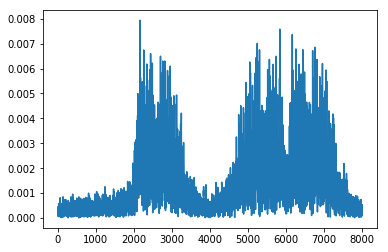

In [33]:
plt.plot(fourier_transform(output,1000,9000))

In [34]:
norm_1 = np.linalg.norm(fourier_transform(output, 1000, 1100))
norm_2 = np.linalg.norm(fourier_transform(output, 4900, 5000))
norm_3 = np.linalg.norm(fourier_transform(output, 5000, 5100))
norm_4 = np.linalg.norm(fourier_transform(output, 8900, 9000))
fallen_index = np.argmin(np.array([norm_1, norm_2, norm_3, norm_4]))
print("Part {} has fallen".format(fallen_index +1 ))

Part 1 has fallen


In [35]:
if fallen_index < 2:
    output_low_passed = low_pass(shift(output, -f_2), 2000)
else :
    output_low_passed = low_pass(shift(output, -f_1), 2000)

In [36]:
convolution_start = np.correlate(output_low_passed,start_random , mode = 'same')
convolution_end = np.correlate(output_low_passed,end_random , mode = 'same')

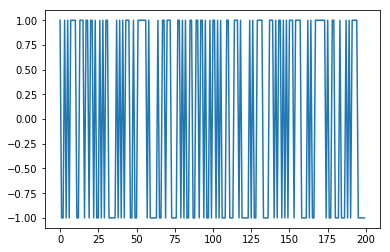

In [37]:
plt.plot(start_random)

In [40]:
#start = np.argmax(convolution_start - norm_start*convolved_norm_output) + len(transformed_start)//2
#end = np.argmax(convolution_end - norm_end*convolved_norm_output) - len(transformed_start)//2
start = np.argmax(convolution_start) + len(start_random)//2
end =  np.argmax(convolution_end) - len(end_random)//2
print(start, end)

11967 11407


Var_finale = a**2 * Var_debut + Var_bruit
=> a_factor = sqrt((Var_finale - Var_bruit)/Var_debut)
1) 0.34 2) 0.69

In [343]:
var_beg = np.std(a_transmitted[len(signal_start_low_passed):-len(signal_end_low_passed)])
var_noise = np.std(output[:start])**2
print(var_noise)
var_end = np.std(output_low_passed[start:end])
a_factor = np.sqrt((var_end - var_noise)/var_beg)

NameError: name 'signal_start_low_passed' is not defined

In [344]:
print(a_factor)

NameError: name 'a_factor' is not defined

In [345]:
print(a.shape, output_low_passed[start:end].shape)

(4941,) (0,)


In [346]:
print(array_2_pre_decode.shape == a.shape)

NameError: name 'array_2_pre_decode' is not defined

In [347]:
#plt.plot(fourier_transform(array_2_pre_decode, 0, 10000))

In [348]:
array_2_low_passed = low_pass(array_2_pre_decode, 2000)
#plt.plot(fourier_transform(array_2_low_passed, 0, 10000))

NameError: name 'array_2_pre_decode' is not defined

In [349]:
def decode(array) : 
    size = len(basis_2)
    result = np.zeros(len(constellation))
    for i in range(len(constellation))  :
        result[i] = np.sum(basis_2*array[size*i: size*(i+1)])
    return (np.sign(result)+1)/2

In [350]:
def decode_2(array) :
    result = np.zeros(size_sent)
    for i in range(size_sent):
        result[i] = np.sum(basis_2 * array[n_T*i : 200+n_T*i])

    return (np.sign(result)+1)/2  

In [351]:
d = decode_2(array_2_low_passed)
print(np.sum(np.abs((d*2-1 - constellation)/2))/ len(d))
result = bit_to_text(d)
print(result)
print(result == string_text)

NameError: name 'array_2_low_passed' is not defined

In [340]:
##### qam
def qam(array):
    pad_val = int(T//T_s)
    int_size = pad_val + f_s
    
    loop_size = len(array)//2
    
    result = np.zeros(loop_size*int_size)
    
    for i in range(loop_size) : 
        r1 = array[2*i]*basis()
        r1 =  np.pad(r1, (0,pad_val) ,'constant', constant_values = (0))
        #need to pad to add 0 at the begining
        
        r2  = array[2*i+1]*basis()
        r2 =  np.pad(r2, (pad_val,0) ,'constant', constant_values = (0))
        r = r1+r2
        result[i*int_size : (i+1)*int_size ] = r
        
    return result

In [ ]:
a = [1,-1,1]
qam(a)